In [37]:
%matplotlib inline

In [38]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from vtk_rw import read_vtk
from plotting import plot_surf_stat_map, crop_img # from https://github.com/juhuntenburg/brainsurfacescripts
import matplotlib as mpl
import cmocean 
from nilearn import plotting
import scipy.stats as stats

In [39]:
def load_pickle(pkl_file):
    pkl_in = open(pkl_file, 'r')
    pkl_dict = pickle.load(pkl_in)
    pkl_in.close()
    return pkl_dict

### Load surfaces

In [40]:
infl=150
lh_mesh_file = '/nobackup/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/lh_lowres_new_taubin_%i.vtk'%infl
lh_sulc_file = '/nobackup/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/lh_lowres_new_taubin_%i_sulc.npy'%infl
rh_mesh_file = '/nobackup/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/rh_lowres_new_taubin_%i.vtk'%infl
rh_sulc_file = '/nobackup/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/rh_lowres_new_taubin_%i_sulc.npy'%infl
fullmask_file = '/nobackup/ilz3/myelinconnect/new_groupavg/masks/fullmask_lh_rh_new.npy'
vizmaks_file = '/nobackup/ilz3/myelinconnect/new_groupavg/masks/fullmask_lh_rh_viz.npy'
lh_sulc = np.load(lh_sulc_file)
lv, lf, _ = read_vtk(lh_mesh_file)
rh_sulc = np.load(rh_sulc_file)
rv, rf, _ = read_vtk(rh_mesh_file)
fullmask = np.load(fullmask_file)
darkness=0.6
figsize_left = (10,9)
figsize_right = (10,7.3)
figsize_dorsal = (10,10)

### Load FC1 and FC1,5,6 model

In [44]:
t1_predict_file_0 = '/nobackup/ilz3/myelinconnect/new_groupavg/model/linear_combination/t1avg/smooth_1.5/both_t1avg_by_fc_maps_0.pkl'
t1_predict_0 = load_pickle(t1_predict_file_0)
fc1 = t1_predict_0['modelled_fit'][nonmask]

t1_predict_file_best = '/nobackup/ilz3/myelinconnect/new_groupavg/model/linear_combination/t1avg/smooth_1.5/both_t1avg_by_fc_maps_best.pkl'
t1_predict_best = load_pickle(t1_predict_file_best)
best = t1_predict_best['modelled_fit'][nonmask]

### Load T1 profiles, exclude outer 3 layers on each side

In [7]:
profiles_lh = np.load('/nobackup/ilz3/myelinconnect/new_groupavg/profiles/smooth_1.5/lh_lowres_new_avgsurf_groupdata_mean.npy')
profiles_rh = np.load('/nobackup/ilz3/myelinconnect/new_groupavg/profiles/smooth_1.5/rh_lowres_new_avgsurf_groupdata_mean.npy')
profiles = np.concatenate((profiles_lh, profiles_rh))
profiles[fullmask] = 0
profiles_masked = profiles[nonmask, 3:8]

### Correlate different layers to FC1

In [63]:
mean_fc1=stats.pearsonr(fc1, np.mean(profiles_masked, axis=1))[0]
low_fc1=stats.pearsonr(fc1, profiles_masked[:,0])[0]
middle_fc1=stats.pearsonr(fc1, profiles_masked[:,2])[0]
high_fc1=stats.pearsonr(fc1, profiles_masked[:,4])[0]

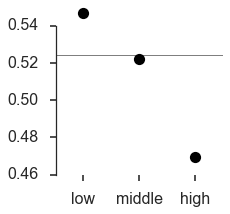

In [102]:
sns.set_style('ticks')
sns.set_context('poster', font_scale=1)
fig = plt.figure(figsize=(3,3))
plt.plot([low_fc1, middle_fc1, high_fc1], 'ko')
plt.xticks([0,1,2],['low', 'middle', 'high'])
plt.hlines(mean_fc1, -0.5, 2.5, linestyle='-', linewidth=1, colors='black',alpha=0.5)
sns.despine(trim=True,bottom=True)

In [103]:
print 'mean', mean_fc1
print 'low', low_fc1
print 'middle', middle_fc1
print 'high', high_fc1

mean 0.524181194775
low 0.546845235545
middle 0.522166753278
high 0.469393035187


### Correlate different layers to FC1, 5, 6

In [104]:
mean_best = stats.pearsonr(best, np.mean(profiles_masked, axis=1))[0]
low_best=stats.pearsonr(best, profiles_masked[:,0])[0]
middle_best=stats.pearsonr(best, profiles_masked[:,2])[0]
high_best=stats.pearsonr(best, profiles_masked[:,4])[0]

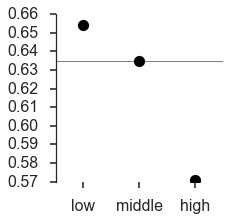

In [112]:
sns.set_style('ticks')
sns.set_context('poster', font_scale=1)
fig = plt.figure(figsize=(3,3))
plt.plot([low_best, middle_best, high_best], 'ko')
plt.xticks([0,1,2],['low', 'middle', 'high'])
plt.hlines(mean_best, -0.5, 2.5, linestyle='-', linewidth=1, colors='black',alpha=0.5)
sns.despine(trim=True,bottom=True)

In [105]:
print 'mean', mean_best
print 'low', low_best
print 'middle', middle_best
print 'high', high_best

mean 0.635076587734
low 0.654183506243
middle 0.63510405497
high 0.570751126736


### Plot different layers

In [48]:
def brain_fig(plot_list):
    sns.set_style('white')
    n = len(plot_list)
    rows = int(n/2)
    fig = plt.figure(figsize=(12,rows*5))
    for img in range(n):
        ax = fig.add_subplot(rows,2,img+1)
        plt.imshow(plot_list[img])
        ax.set_axis_off()
    fig.tight_layout()
    return fig

def dorsal_fig(plot_list):
    sns.set_style('white')
    n = len(plot_list)
    rows = int(n/2)
    fig = plt.figure(figsize=(8,rows*10))
    for img in range(n):
        ax = fig.add_subplot(rows,2,img+1)
        plt.imshow(plot_list[img])
        ax.set_axis_off()
    fig.tight_layout()
    return fig

def occ_fig(plot_list):
    sns.set_style('white')
    n = len(plot_list)
    rows = int(n/2)
    fig = plt.figure(figsize=(6,rows*5))
    for img in range(n):
        ax = fig.add_subplot(rows,2,img+1)
        plt.imshow(plot_list[img])
        ax.set_axis_off()
    fig.tight_layout()
    return fig

In [114]:
def plot_layer(data, vmin, vmax, thr):
    
    sns.set_context(None)
    cropped_img = []
    vmin=vmin
    vmax=vmax
    cmap=cmocean.cm.tempo_r
    sns.set_style('white')
    for (elev, azim) in [(180, 0), (180, 180)]:
        plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                                bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                                elev=elev,azim=azim, figsize=figsize_left,threshold=thr, 
                                symmetric_cbar=False, vmin=vmin, vmax=vmax)
        cropped_img.append(crop_img(plot))

    for (elev, azim) in [(180, 0), (180, 180)]:
        plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:],  cmap=cmap, 
                                bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                                elev=elev,azim=azim, figsize=figsize_right,threshold=thr, 
                                symmetric_cbar=False, vmin=vmin, vmax=vmax)
        cropped_img.append(crop_img(plot))

    fig=brain_fig(cropped_img)

    sns.set_style('whitegrid')
    sns.set_context('notebook', font_scale=4)
    cmap = cmocean.cm.tempo_r
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_axes([0.05, 0.05, 0.05, 0.9])
    mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='vertical')

    sns.set()

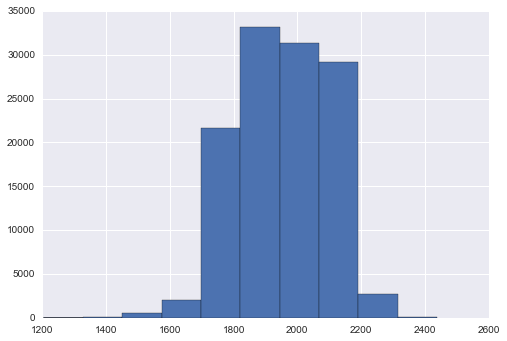

In [122]:
sns.set()
plt.hist(profiles[:,4][np.where(profiles[:,4]>1200)]);

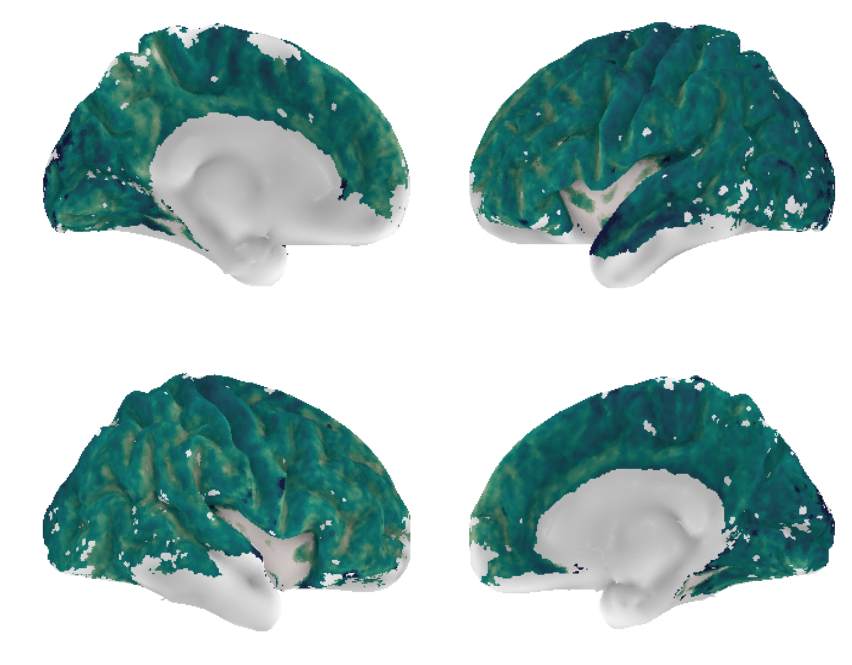

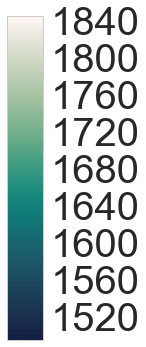

In [117]:
plot_layer(profiles[:,0], 1500, 1850, 1400)

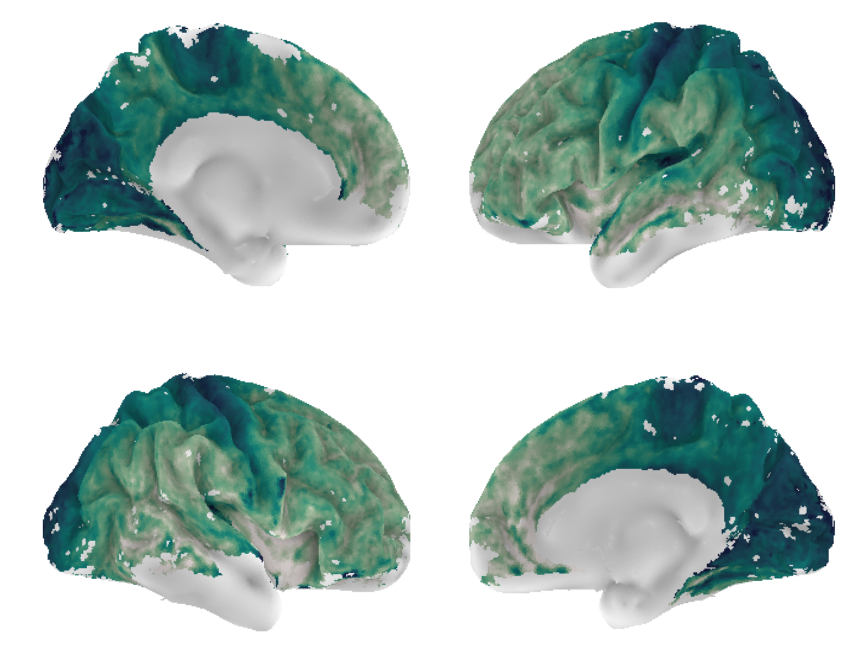

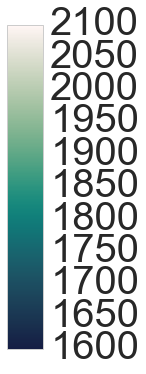

In [121]:
plot_layer(profiles[:,2], 1600, 2100, 1500)

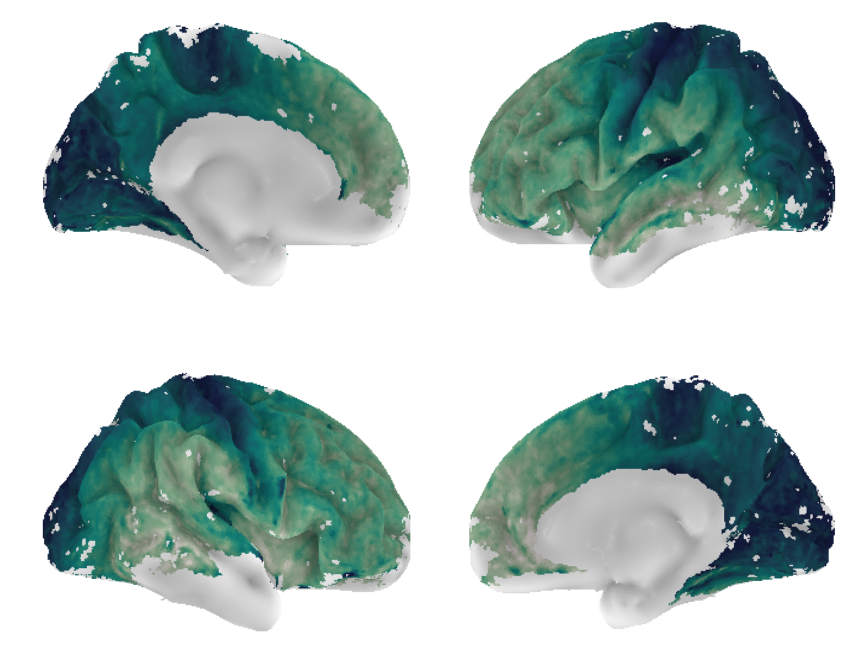

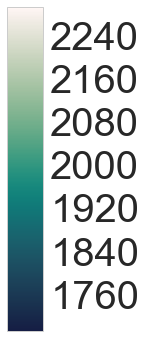

In [123]:
plot_layer(profiles[:,4], 1700, 2300, 1600)